In [1]:
import numpy as np

# Load the Reddit dataset NPZ file
data = np.load("C:\\Users\\nisha\\Downloads\\redditdata\\reddit_graph.npz")

# See the keys available in the dataset
print("Keys available in the dataset:", list(data.keys()))
row = data['row']
col = data['col']
shape = data['shape']

# Calculate the number of nodes and edges
num_nodes = shape[0]
num_edges = len(row)

print("Size of the dataset:")
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Keys available in the dataset: ['format', 'col', 'data', 'shape', 'row']
Size of the dataset:
Number of nodes: 232965
Number of edges: 114615892


In [6]:

# Extract relevant information
row = data['row']
col = data['col']

# Sample a subset of nodes and edges
num_samples = 3000 # Adjust this number according to your hardware limitations
indices = np.random.choice(len(row), num_samples, replace=False)

sampled_row = row[indices]
sampled_col = col[indices]

In [9]:
for row_val, col_val in zip(sampled_row, sampled_col):
    print(row_val, col_val)


55525 162259
87867 166551
204540 127927
42256 153097
226734 181390
127703 30873
116786 157109
64726 222157
217541 27123
154222 129723
214154 108888
198383 53643
220299 74998
219129 135157
112966 62366
107492 24006
143000 67998
141079 205235
179746 42937
52715 23651
94122 49483
4922 195069
97685 195550
29712 39091
72357 185035
65788 117930
52195 194663
5850 38211
200049 48611
23061 2110
212244 38305
92317 27513
147994 2127
116628 49785
198149 145113
201109 170579
170110 225379
10810 92659
67044 169190
168573 198121
75838 85051
107813 3053
92544 231291
40131 172182
107152 142734
42351 45367
31284 185586
101898 176206
49975 15797
51942 146514
134817 201030
126063 125406
31118 13742
53167 210239
137844 194678
66618 216662
48954 56196
63965 143915
167530 191402
181006 106254
227010 213851
170359 44804
87391 189620
73915 141739
98751 81997
37721 144201
80971 3643
191562 174417
79415 123133
1817 38175
154000 73188
128523 112450
151652 184753
125286 87083
212803 160175
8257 212506
202251 18498

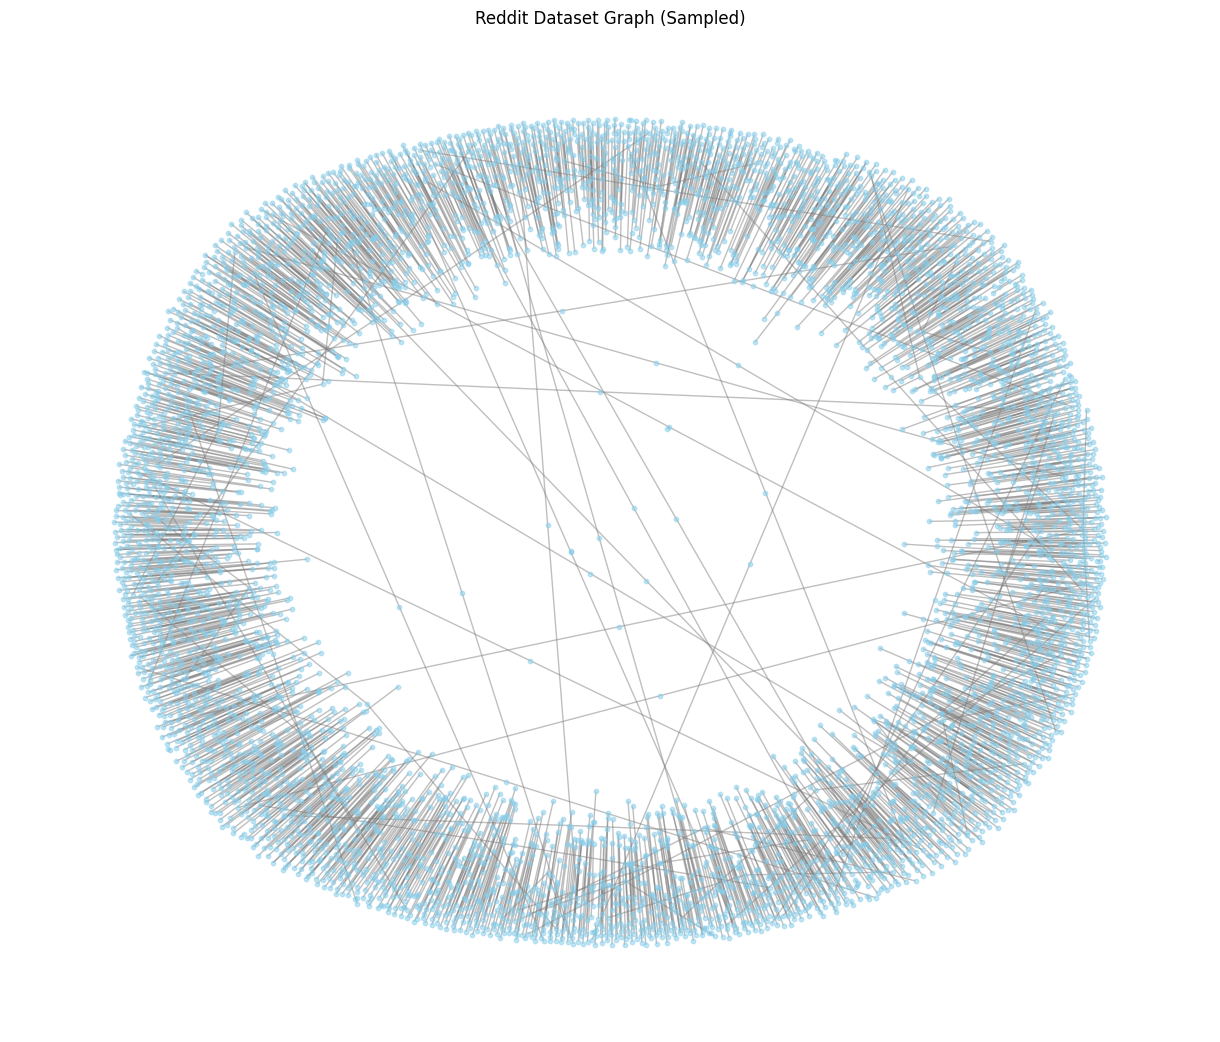

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a directed graph
G = nx.DiGraph()

# Add sampled edges to the graph
for i in range(len(sampled_row)):
    src = sampled_row[i]
    dst = sampled_col[i]
    G.add_edge(src, dst)

# Plot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', alpha=0.5, arrows=False)
plt.title("Reddit Dataset Graph (Sampled)")
plt.show()

In [11]:
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load data from .npz file
data = data_npz
x = data_npz['feature']  # node features
y = data_npz['label']    # node labels

# Choose a subset of the data
subset_size = 1000  # Change this to the desired subset size
x_subset = x[:subset_size]
y_subset = y[:subset_size]

In [12]:

# Dummy edge_index for demonstration (assuming all nodes are connected to each other)
num_nodes = subset_size
edge_index = torch.tensor([[i, j] for i in range(num_nodes) for j in range(num_nodes) if i != j], dtype=torch.long).t()

# Convert to PyTorch Geometric Data object
data = Data(x=torch.tensor(x_subset, dtype=torch.float),
            edge_index=edge_index,
            y=torch.tensor(y_subset, dtype=torch.long))

# Normalize features
data = NormalizeFeatures()(data)

In [13]:

# Define GCN model
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

In [14]:

# Initialize the model
model = GCN(num_features=data.num_features, hidden_channels=16, num_classes=data.y.max().item() + 1)

# Training and testing functions
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()


In [15]:

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    test_correct = pred == data.y
    test_acc = int(test_correct.sum()) / len(data.y)
    return test_acc


In [16]:

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Testingtest_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Epoch: 001, Loss: 3.7136
Epoch: 002, Loss: 3.7057
Epoch: 003, Loss: 3.6976
Epoch: 004, Loss: 3.6893
Epoch: 005, Loss: 3.6802
Epoch: 006, Loss: 3.6709
Epoch: 007, Loss: 3.6614
Epoch: 008, Loss: 3.6505
Epoch: 009, Loss: 3.6390
Epoch: 010, Loss: 3.6271
Epoch: 011, Loss: 3.6158
Epoch: 012, Loss: 3.6029
Epoch: 013, Loss: 3.5878
Epoch: 014, Loss: 3.5737
Epoch: 015, Loss: 3.5599
Epoch: 016, Loss: 3.5455
Epoch: 017, Loss: 3.5282
Epoch: 018, Loss: 3.5136
Epoch: 019, Loss: 3.4960
Epoch: 020, Loss: 3.4816
Epoch: 021, Loss: 3.4682
Epoch: 022, Loss: 3.4551
Epoch: 023, Loss: 3.4420
Epoch: 024, Loss: 3.4340
Epoch: 025, Loss: 3.4200
Epoch: 026, Loss: 3.4126
Epoch: 027, Loss: 3.4054
Epoch: 028, Loss: 3.3995
Epoch: 029, Loss: 3.3944
Epoch: 030, Loss: 3.3905
Epoch: 031, Loss: 3.3878
Epoch: 032, Loss: 3.3840
Epoch: 033, Loss: 3.3815
Epoch: 034, Loss: 3.3792
Epoch: 035, Loss: 3.3771
Epoch: 036, Loss: 3.3755
Epoch: 037, Loss: 3.3743
Epoch: 038, Loss: 3.3728
Epoch: 039, Loss: 3.3724
Epoch: 040, Loss: 3.3713


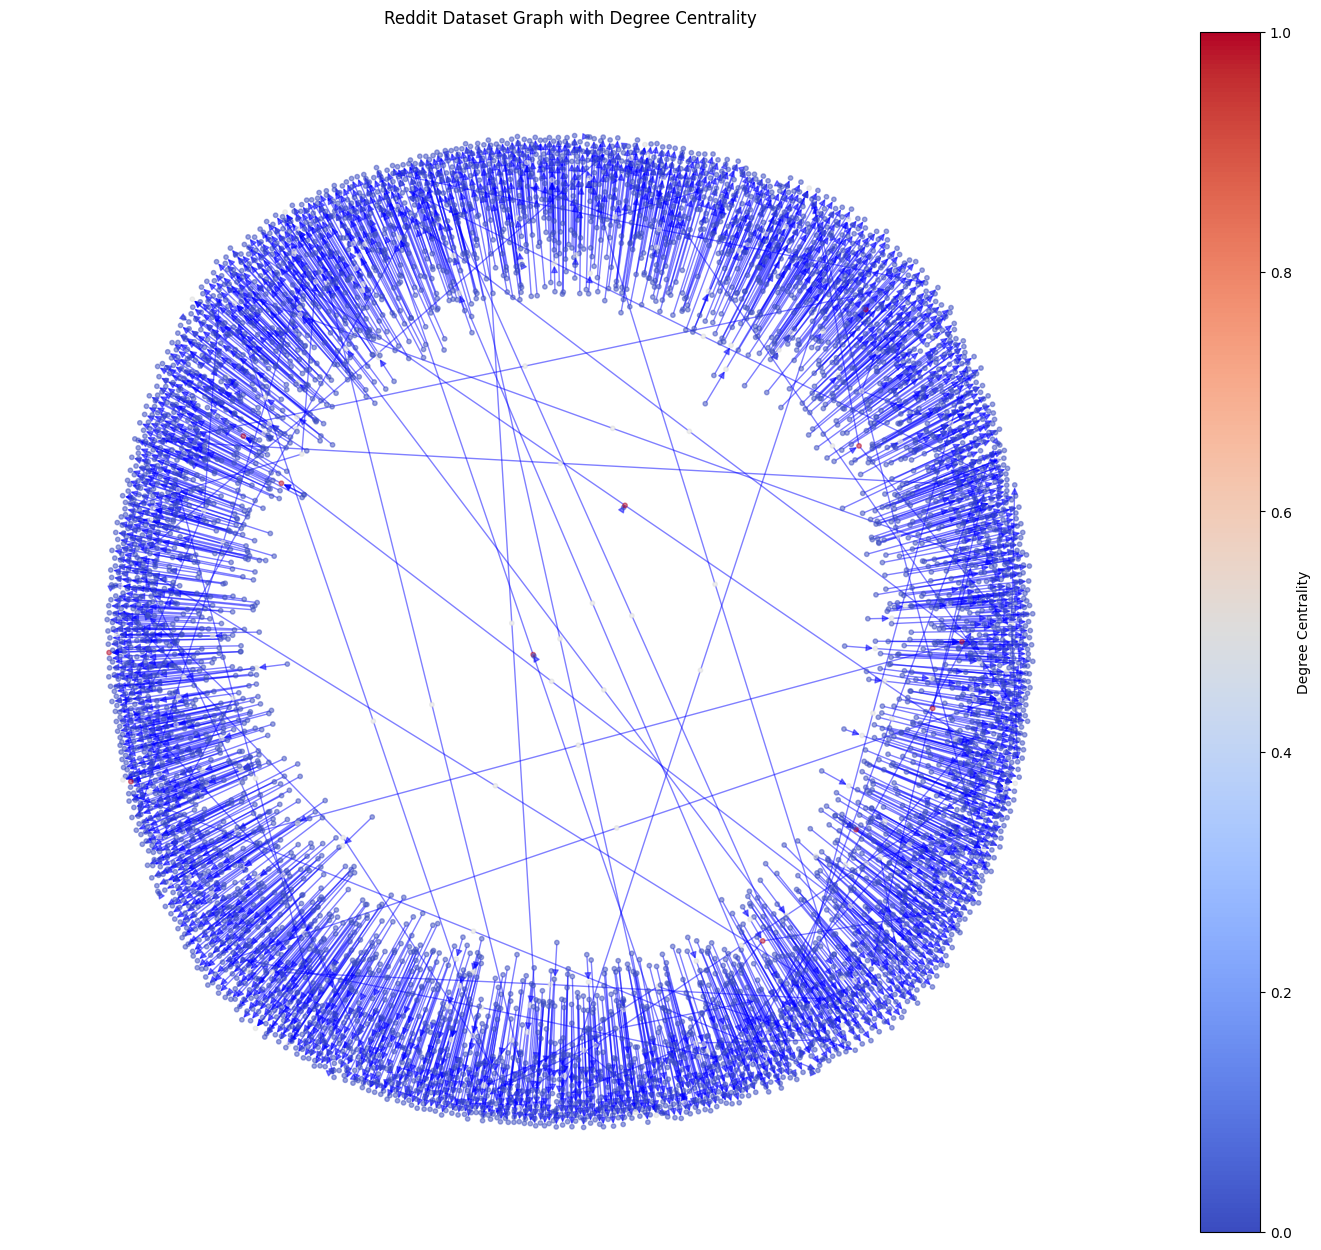

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

degree_centrality = nx.degree_centrality(G)

# Get the degree centrality values for each node
node_colors = [degree_centrality[node] for node in G.nodes()]

# Plot the graph with nodes colored by degree centrality
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.coolwarm,
        edge_color='blue', alpha=0.5, arrows=True)

# Create a dummy scatter plot to define the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.coolwarm)
plt.colorbar(dummy_scatter, label="Degree Centrality")

plt.title("Reddit Dataset Graph with Degree Centrality")
plt.show()


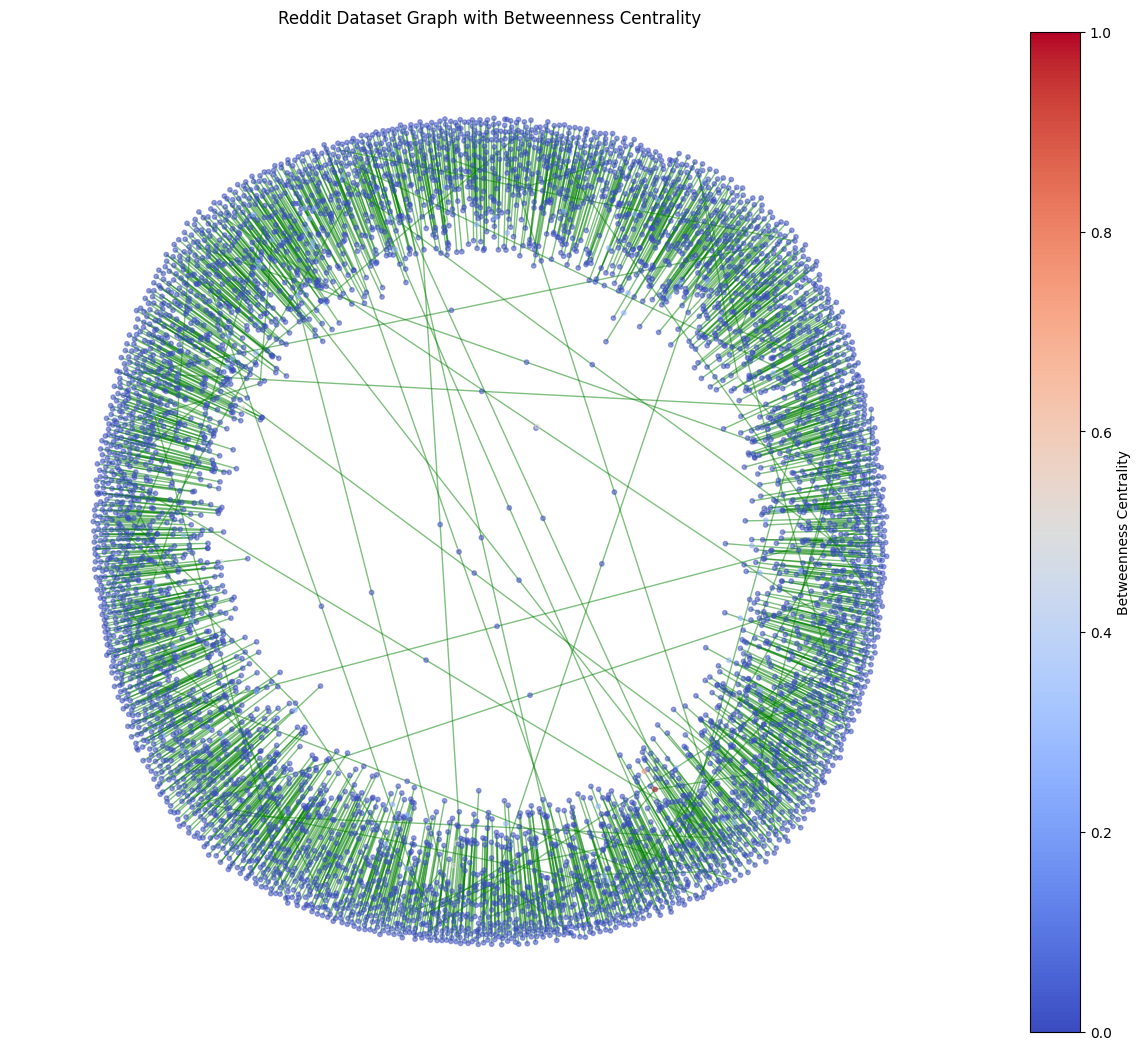

In [18]:

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get the betweenness centrality values for each node
node_colors = [betweenness_centrality[node] for node in G.nodes()]

# Plot the graph with nodes colored by betweenness centrality
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.coolwarm,
        edge_color='green', alpha=0.5, arrows=False)

# Create a dummy scatter plot to define the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.coolwarm)
plt.colorbar(dummy_scatter, label="Betweenness Centrality")

plt.title("Reddit Dataset Graph with Betweenness Centrality")
plt.show()

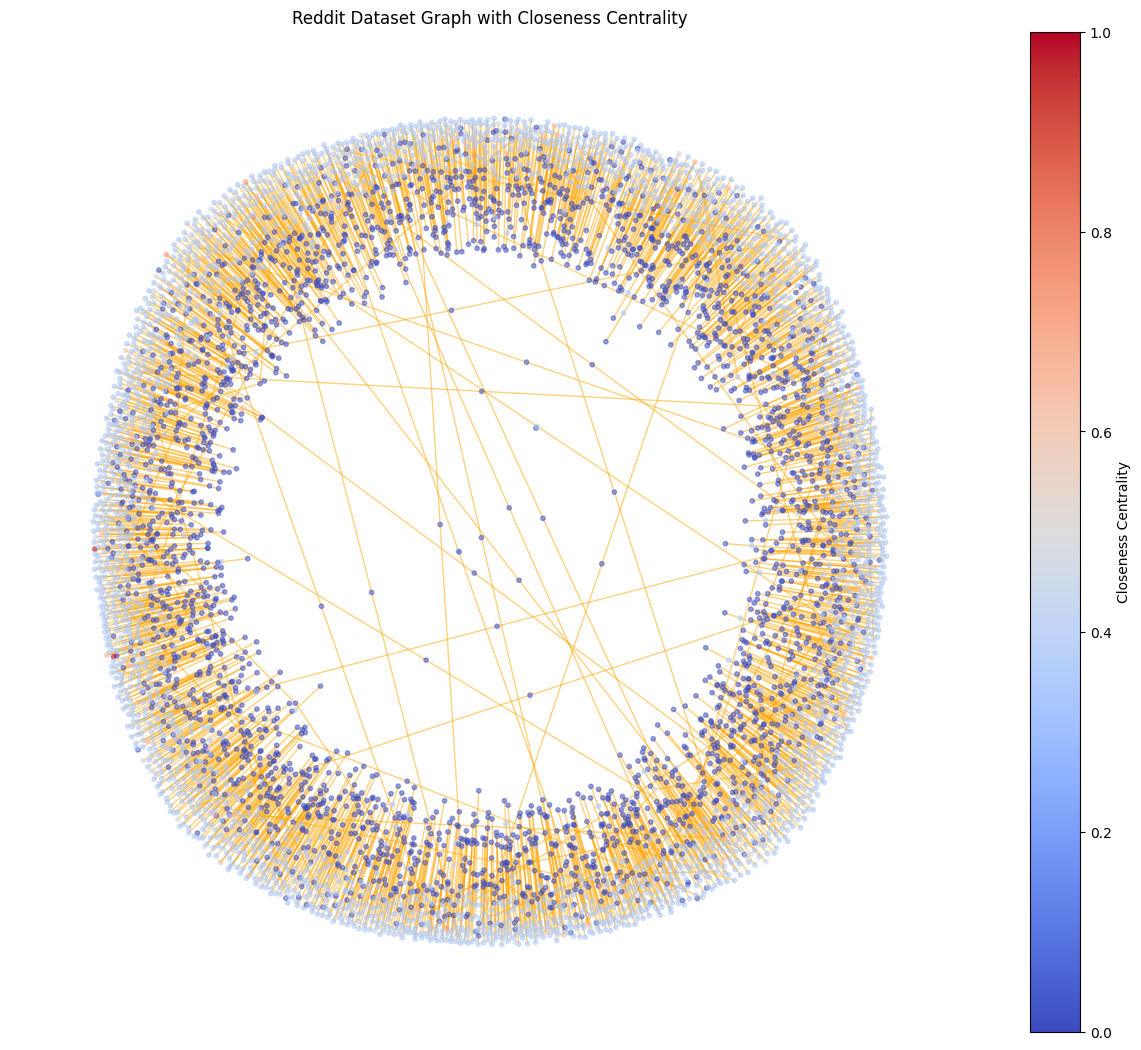

In [19]:

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get the closeness centrality values for each node
node_colors = [closeness_centrality[node] for node in G.nodes()]

# Plot the graph with nodes colored by closeness centrality
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.coolwarm,
        edge_color='orange', alpha=0.5, arrows=False)

# Create a dummy scatter plot to define the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.coolwarm)
plt.colorbar(dummy_scatter, label="Closeness Centrality")

plt.title("Reddit Dataset Graph with Closeness Centrality")
plt.show()

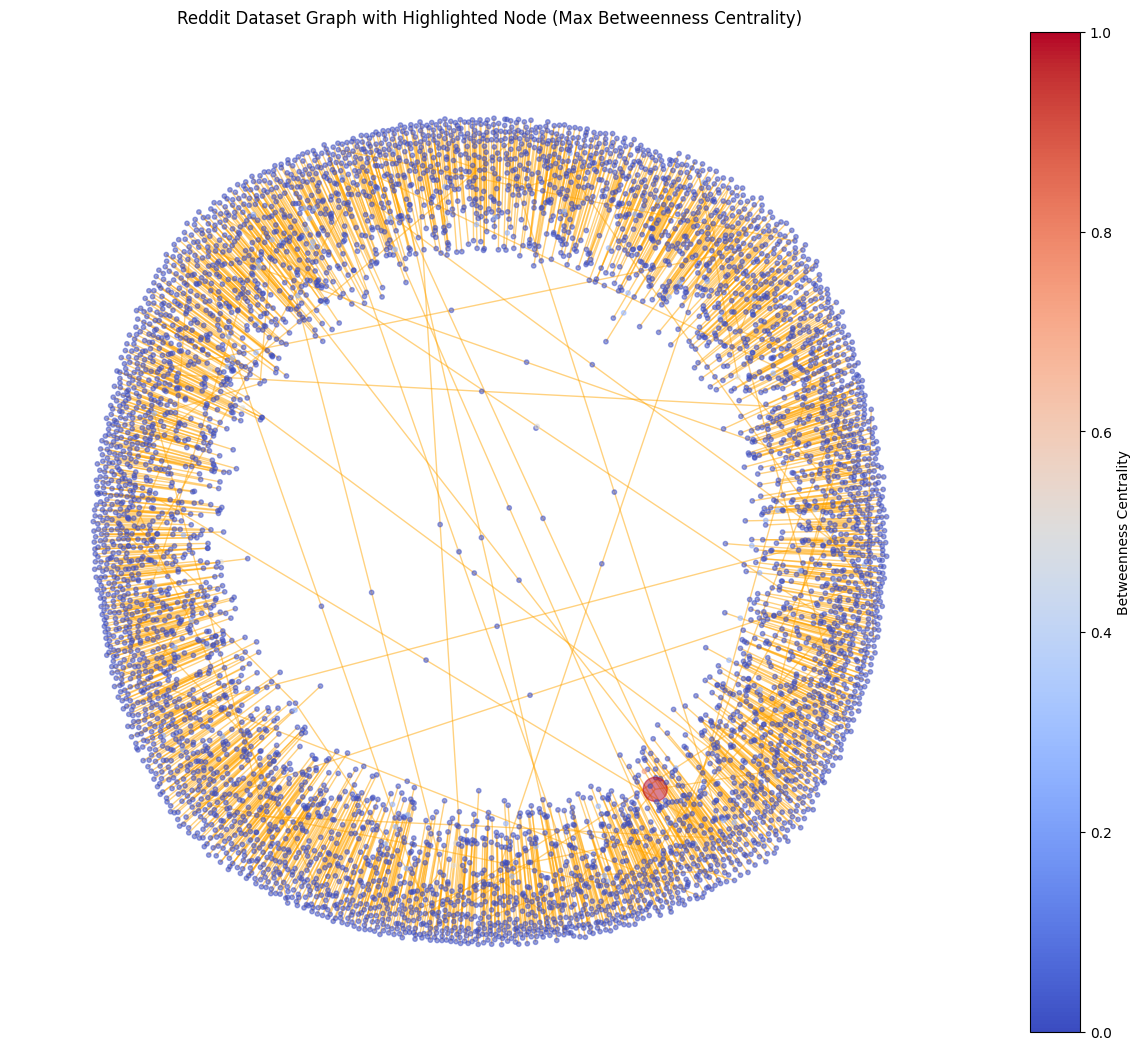

In [20]:

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get the node with the maximum betweenness centrality
max_bc_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Get the betweenness centrality values for each node
node_colors = [betweenness_centrality[node] for node in G.nodes()]

# Set node sizes, increase size for the node with the maximum betweenness centrality
node_sizes = [300 if node == max_bc_node else 10 for node in G.nodes()]

# Plot the graph with nodes colored by betweenness centrality and highlighted node
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm,
        edge_color='orange', alpha=0.5, arrows=False)

# Create a dummy scatter plot to define the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.coolwarm)
plt.colorbar(dummy_scatter, label="Betweenness Centrality")

plt.title("Reddit Dataset Graph with Highlighted Node (Max Betweenness Centrality)")
plt.show()

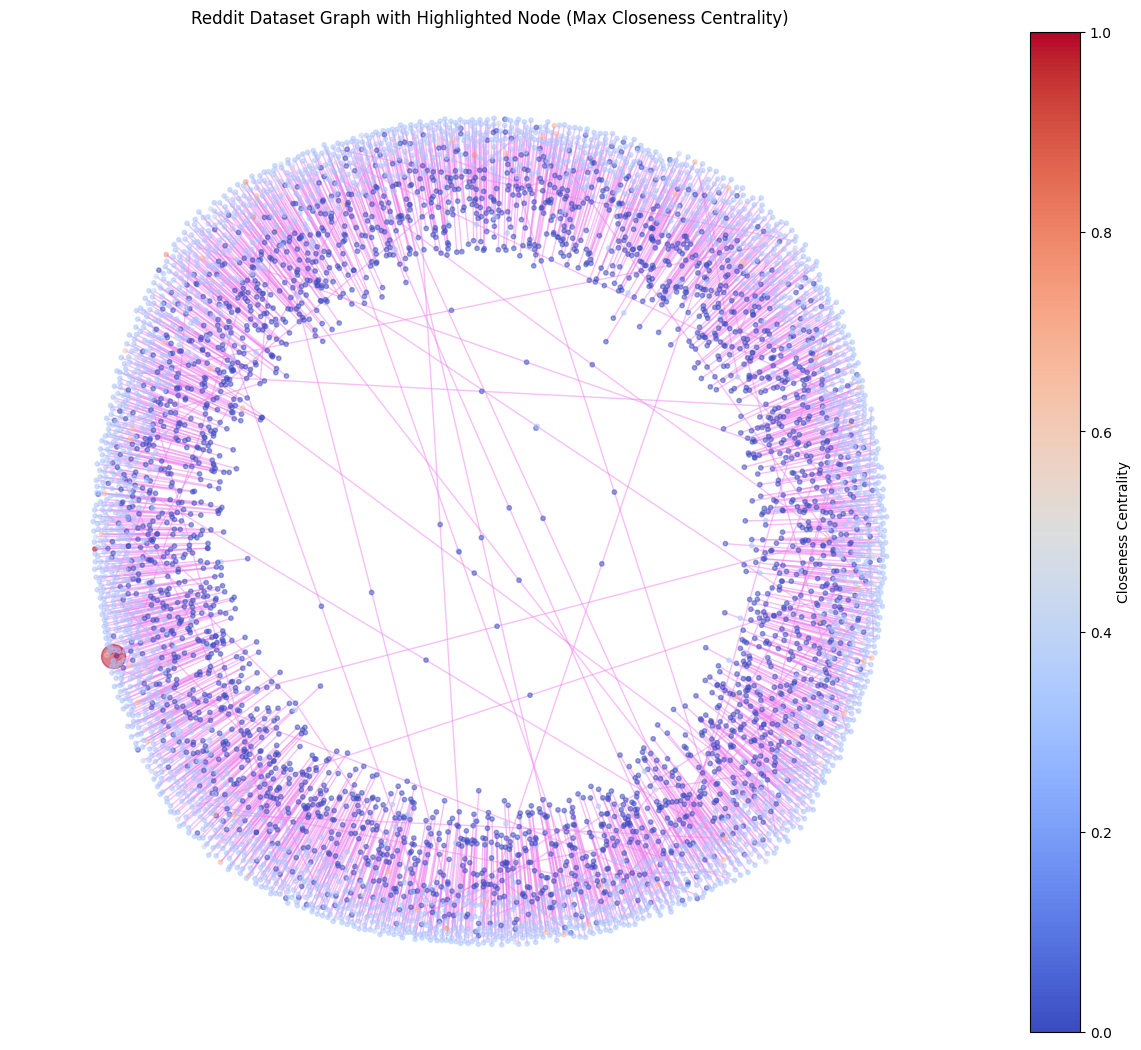

In [21]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get the node with the maximum closeness centrality
max_cc_node = max(closeness_centrality, key=closeness_centrality.get)

# Get the closeness centrality values for each node
node_colors = [closeness_centrality[node] for node in G.nodes()]

# Set node sizes, increase size for the node with the maximum closeness centrality
node_sizes = [300 if node == max_cc_node else 10 for node in G.nodes()]

# Plot the graph with nodes colored by closeness centrality and highlighted node
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm,
        edge_color='violet', alpha=0.5, arrows=False)

# Create a dummy scatter plot to define the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.coolwarm)
plt.colorbar(dummy_scatter, label="Closeness Centrality")

plt.title("Reddit Dataset Graph with Highlighted Node (Max Closeness Centrality)")
plt.show()


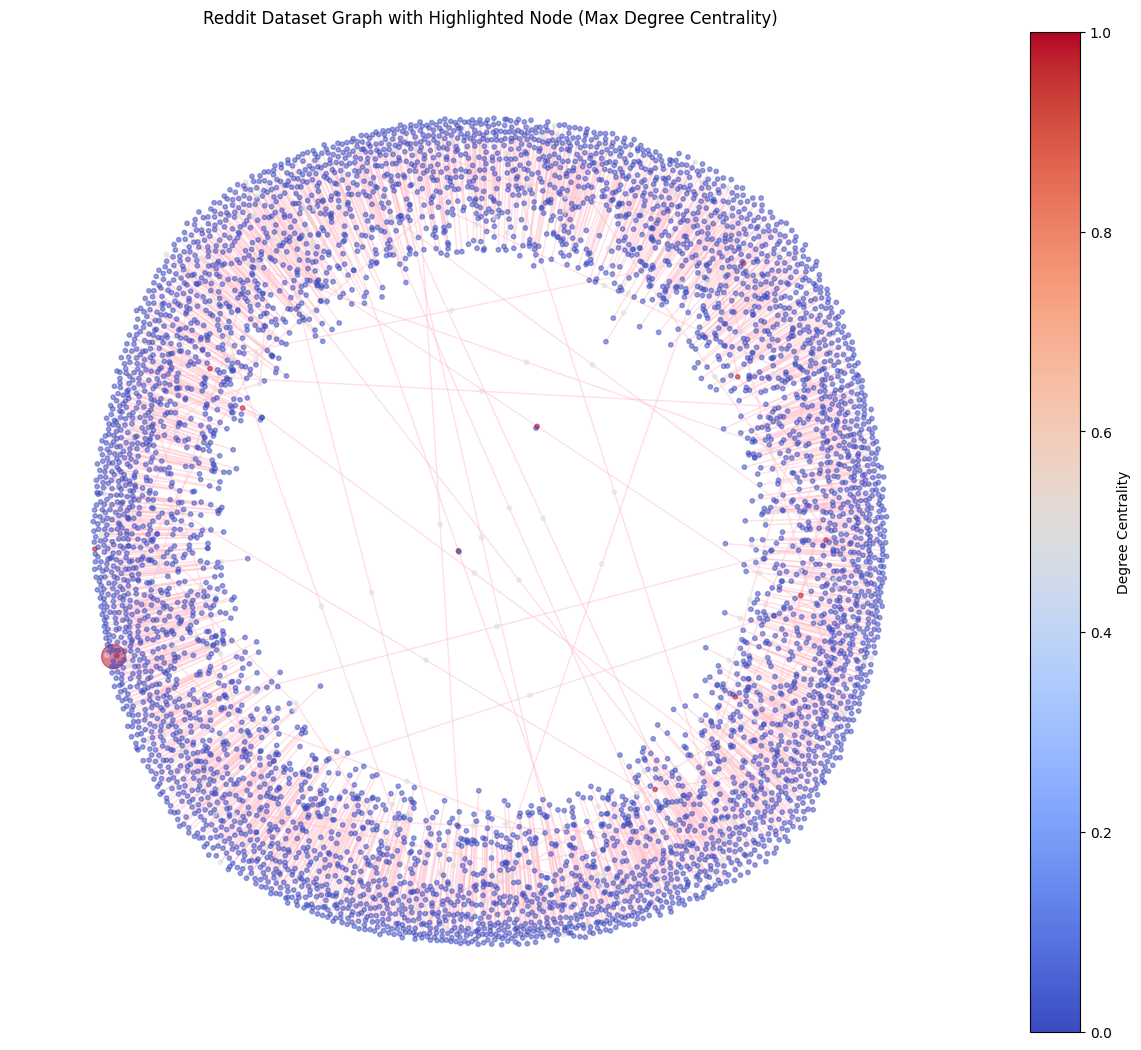

In [22]:

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Get the node with the maximum degree centrality
max_dc_node = max(degree_centrality, key=degree_centrality.get)

# Get the degree centrality values for each node
node_colors = [degree_centrality[node] for node in G.nodes()]

# Set node sizes, increase size for the node with the maximum degree centrality
node_sizes = [300 if node == max_dc_node else 10 for node in G.nodes()]

# Plot the graph with nodes colored by degree centrality and highlighted node
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm,
        edge_color='pink', alpha=0.5, arrows=False)

# Create a dummy scatter plot to define the colorbar
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.coolwarm)
plt.colorbar(dummy_scatter, label="Degree Centrality")

plt.title("Reddit Dataset Graph with Highlighted Node (Max Degree Centrality)")
plt.show()


In [43]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from .npz file
data = data_npz
x = data_npz['feature']  # node features
y = data_npz['label']    # node labels

# Choose a subset of the data
subset_size = 1000  # Change this to the desired subset size
x_subset = x[:subset_size]
y_subset = y[:subset_size]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Test Accuracy:", accuracy)


SVM Test Accuracy: 0.425


In [44]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from .npz file
data = data_npz
x = data_npz['feature']  # node features
y = data_npz['label']    # node labels

# Choose a subset of the data
subset_size = 1000  # Change this to the desired subset size
x_subset = x[:subset_size]
y_subset = y[:subset_size]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", accuracy)


Random Forest Test Accuracy: 0.38


In [45]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from .npz file
data = data_npz
x = data_npz['feature']  # node features
y = data_npz['label']    # node labels

# Choose a subset of the data
subset_size = 1000  # Change this to the desired subset size
x_subset = x[:subset_size]
y_subset = y[:subset_size]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Test Accuracy:", accuracy)


K-Nearest Neighbors Test Accuracy: 0.205
